<a href="https://colab.research.google.com/github/cientistanomade/data_science/blob/main/Segmenta%C3%A7%C3%A3o_de_Clientes_de_Food_Delivery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![segmentar.jpg](https://blog.locaweb.com.br/wp-content/uploads/2022/05/estrategias-para-segmentar-o-publico-na-internet.png)

# **Segmentação de Clientes**








A segmentação de clientes é o processo de dividir os clientes em grupos com base em características comuns, para que as empresas possam comecializar para cada grupo de forma eficaz e adequada, ou simplesmente compreender o padrão de consumo dos clientes.

A segmentação pode ser praticada por todas as empresas, independentemente do tamanho ou setor, e se vendem on-line ou presencialmente. Começa com a coleta de dados, passa para a análise desses dados, segue com a entrega das conslusões e termina com a atuação nas informações coletadas.

Uma pequena empresa que vende guitarras, por exemplo, pode decidir promover produtos com preços mais baixos para guitarristas mais jovens e guitarras premium com preços mais altos para guitarristas mais velhos, com base no conhecimento do segmento que lhes diz que os guitarristas mais jovens têm menos renda disponível do que seus colegas mais velhos.


# **Por que Segmentar?**
Permite que os profissionais de marketing adaptem melhor seus esforços, quer seja em relação a desevolvimento de produtos ou comunicação com os clientes em vários subgrupos de público-alvo, além de aumentar as chances de encontrar leads qualificadas e gerar mais vendas.

**Lead** é uma oportunidade de negócio para a empresa, em outras palavras, é alguém que forneceu suas informações de contato (nome, email, telefone, etc.) em troca de uma oferta de valor (conteúdo, ferramenta, avaliação, entre outros).

# **Quais as Vantagens de Segmentação os Clientes?**
Entre outros vantagens que podemos citar, estão: 

* Oferecer uma melhor experiência do cliente;

* Estabelecer melhores relacionamentos com os clientes;

* Criar e comunicar mensagens de marketing direcionadas que ressoarão com grupos específicos;

*   Identificar maneiras de melhorar o produto/serviço ou novas oportunidades em mercados nichados;

*  Selecionar o melhor canal de comunicação para o segmento;

* Testar opções de preço;

* Diferenciar a marca da concorrência;

* Atrair e converter leads mais qualificadas;

* Concentrar-se nos clientes mais rentáveis.

# **Como Segmentar Clientes?**

Em primeiro lugar, é fundamental que a empresa colete informações específicas (dados sobre cliente), para identificação de padrões que podem ser usados na construição de segmentos.

Parte desses dados podem ser obtidos a partir de informações de compras, cargo, geografia, produtos adquiridos, a forma como o cliente entrou no sistema e etc.

Os métodos típicos de coleta de informações incluem:
* Entrevistas presenciais ou via telefonema;
* Pesquisas;
* Coletas de informações publicadas sobre categorias de mercado;
* Grupos de foco;
* Dados de acessos a sistemas ou apps.

# **Problema**

A empresa *XYZ* reuniu os dados das transações de todas as unidades que possuem food delivery e consolidou em um arquivo csv para que o cientista de dados *Wesley Canaam* consigam extrair resultados analíticos que possam fornecer assistência para impulsionar os esforços do time de marketing.


![segmentar2.jpg](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTcMOhLpSlIHLU3ZRZkYdpC8Q5_8I8DpjflwSWB-D59aKHkKpquLBOXSe2TysQlz4UokP0&usqp=CAU)


## **Hipóteses Iniciais**
Coletar informações sobre as entregas e a partir daí irei fazer uma análise exploratória para compreender os dados, em seguida irei descrever o comportamento dos dados, depois irei iniciar a preparação do modelo de *Machine Learning*, e então segmentar os clientes, uma vez feito a segmentação avaliarei se o modelo está eficiente e apresentarei o resultado final para os tomadores de decisão

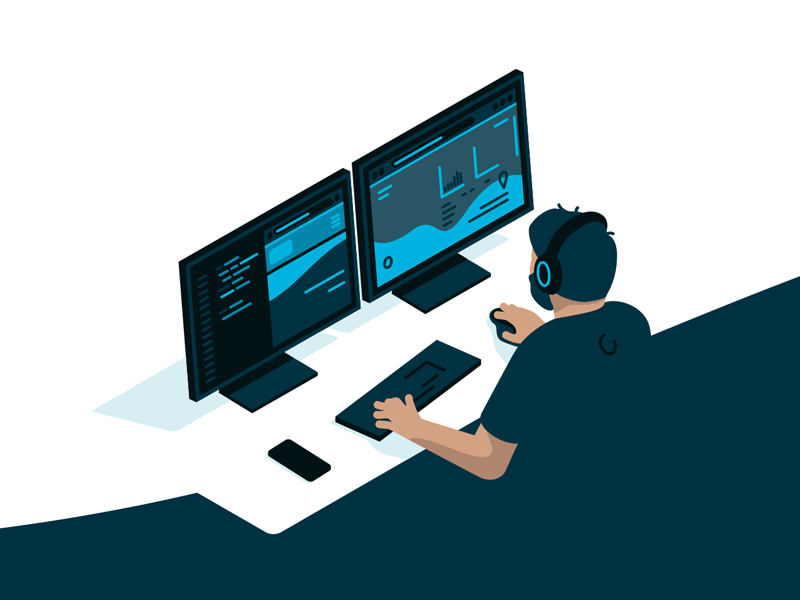

### **Inciandodo o Desenvolvimento do Projeto**

dataset: https://drive.google.com/file/d/1vzaMf3IMTkxaOUv38nkg9UK6QmTZeKoz/view?usp=sharing

## Carregando os Pacotes e os Dados

In [96]:
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15, 6))

dataset =  pd.read_csv('/content/dataset.csv', encoding = 'utf-8')

<Figure size 1080x432 with 0 Axes>

## Compreendendo os dados

In [97]:
print("Dimensões do DataFrame")
print("Entradas: \t{}".format(dataset.shape[0]))
print("Variáveis: \t{}\n".format(dataset.shape[1]))

display(dataset.dtypes)

Dimensões do DataFrame
Entradas: 	260645
Variáveis: 	7



id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

## Dicionário de dados




| Variável | Descrição 
|--- |--- 
 | **id_transacao** | Id da transação
| **horario_pedido** | Horário exato do pedido 
| **localidade** | Unidade do restaurante que processou o pedido 
| **nome_item** | Nome do produto adiquirido 
| **quantidade_item** | Quantidade de produtos no pedido
| **latitude** | Latitude da localidade onde o pedido foi gerado 
| **longitude** | Longitude da localidade onde o pedido foi gerado 

## Análise Exploratória

Vamos explorar os dados por diferentes perspectivas e compreender um pouco mais o relacionamento entre as variáveis

In [98]:
dataset.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

In [99]:
dataset.isnull().sum() / dataset.shape[0]

id_transacao       0.0
horario_pedido     0.0
localidade         0.0
nome_item          0.0
quantidade_item    0.0
latitude           0.0
longitude          0.0
dtype: float64

In [100]:
dataset.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [101]:
dataset.describe(include='O')

,id_transacao,horario_pedido,nome_item
count,260645,260645,260645
unique,100000,76799,4
top,0x1893a6,2019-01-03 17:53:00,sobremesa
freq,4,24,100000


In [102]:
total_pedidos = []

print("\nIniciando o agrupamento para o cálculo do total de pedidos. Aguarde...")

for k, group in dataset.groupby('id_transacao'):
  for m, n in group.groupby('horario_pedido'):
    id_transacao = k
    horario_pedido = m
    localidade = n['localidade'].values.tolist()[0]
    bebida = 0
    pizza = 0
    sobremesa = 0
    salada = 0
    n = n.reset_index(drop=True)

    for i in range(len(n)):
      item = n.loc[i, 'nome_item']
      num = n.loc[i, 'quantidade_item']
      if item == 'bebida':
        bebida = bebida + num

      elif item == 'pizza':
        pizza = pizza + num
      
      elif item == 'sobremesa':
        sobremesa = sobremesa + num

      elif item == 'salada':
        salada = salada + num

    output = [id_transacao, horario_pedido, localidade, bebida, pizza, sobremesa, salada] 
    total_pedidos.append(output)
  
print("\nAgrupamento concluído!")


Iniciando o agrupamento para o cálculo do total de pedidos. Aguarde...

Agrupamento concluído!


In [103]:
df_pivot = pd.DataFrame(total_pedidos)
df_pivot.sample(3)

,0,1,2,3,4,5,6
10598,0x1e86ac,2019-02-25 11:56:00,8,0,1,1,0
65824,0x69f428,2019-11-05 23:53:00,2,0,2,2,0
57118,0x5e3f59,2019-07-17 19:32:00,1,2,2,2,0


In [104]:
df_pivot.columns = ['Id_transacao','Horario_pedido','Localidade','Bebida','Pizza','Sobremesa','Salada']
df_pivot.head(10)

,Id_transacao,Horario_pedido,Localidade,Bebida,Pizza,Sobremesa,Salada
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0
5,0x1002af,2019-12-28 17:25:00,9,3,3,4,1
6,0x10034c,2019-03-12 18:17:00,5,3,4,4,0
7,0x100378,2019-10-13 18:44:00,4,4,4,5,1
8,0x100391,2019-10-10 18:07:00,5,4,4,4,0
9,0x1003a9,2019-06-23 00:39:00,6,0,2,2,0


In [105]:
df_pivot.head(10)

,Id_transacao,Horario_pedido,Localidade,Bebida,Pizza,Sobremesa,Salada
0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0
1,0x100058,2019-05-05 00:08:00,6,0,2,2,0
2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1
3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0
4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0
5,0x1002af,2019-12-28 17:25:00,9,3,3,4,1
6,0x10034c,2019-03-12 18:17:00,5,3,4,4,0
7,0x100378,2019-10-13 18:44:00,4,4,4,5,1
8,0x100391,2019-10-10 18:07:00,5,4,4,4,0
9,0x1003a9,2019-06-23 00:39:00,6,0,2,2,0


Observe como uma simples mudança nos dados já oferece uma perspectiva completamente diferente. Foi criada uma tabela pivot que fornecerá o número de vezes que cada item foi solicitado em cada pedido. 👀 🍕 🥗 🍹

In [106]:
df_pivot.describe()

,Localidade,Bebida,Pizza,Sobremesa,Salada
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.004700,1.239590,1.857840,2.569210,0.711370
std,2.544811,1.627886,1.588589,1.332084,1.086524
min,1.000000,0.000000,0.000000,1.000000,0.000000
25%,3.000000,0.000000,1.000000,1.000000,0.000000
50%,5.000000,0.000000,1.000000,2.000000,0.000000
75%,7.000000,3.000000,3.000000,4.000000,1.000000
max,9.000000,5.000000,5.000000,5.000000,5.000000


In [107]:
df_pivot_idx = df_pivot.fillna(0).reset_index()

O código acima foi criado, porque a segmentação dos pedidos dos clientes precisam de uma variável de identificação de cada registro, não pode ser Id_transacao, porque essa variável não representa um dado válido e além disso não é um valor único, logo não pode se usado como índice, substitui possíveis valores NA por 0 e transformei o índice em variável.

In [108]:
df_pivot_idx.nunique()

index             100000
Id_transacao      100000
Horario_pedido     76799
Localidade             9
Bebida                 6
Pizza                  6
Sobremesa              5
Salada                 6
dtype: int64

In [109]:
df_pivot_idx.isnull().sum()

index             0
Id_transacao      0
Horario_pedido    0
Localidade        0
Bebida            0
Pizza             0
Sobremesa         0
Salada            0
dtype: int64

In [110]:
df_pivot_idx['Mes'] = df_pivot_idx.Horario_pedido.apply(lambda i: time.strftime("%m", time.strptime(i, "%Y-%m-%d %H:%M:%S")))
df_pivot.sample(3)

,Id_transacao,Horario_pedido,Localidade,Bebida,Pizza,Sobremesa,Salada
76643,0x78f6a2,2019-08-19 19:32:00,4,1,1,1,0
98802,0x97a624,2019-07-16 18:46:00,7,4,4,5,1
25924,0x335cc3,2019-12-13 18:24:00,7,4,4,4,0


Adicionando variável no df_pivot do código acima, pois em algum momento pode ser interessante fazer a *segmentação por mês*.

In [111]:
df_pivot_idx.dtypes

index              int64
Id_transacao      object
Horario_pedido    object
Localidade         int64
Bebida             int64
Pizza              int64
Sobremesa          int64
Salada             int64
Mes               object
dtype: object

In [112]:
df_pivot_idx['Mes'].nunique()

12

In [113]:
df_pivot_idx.index

RangeIndex(start=0, stop=100000, step=1)

## Análise Descritiva

Irei descrever os aspctos importantes do dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

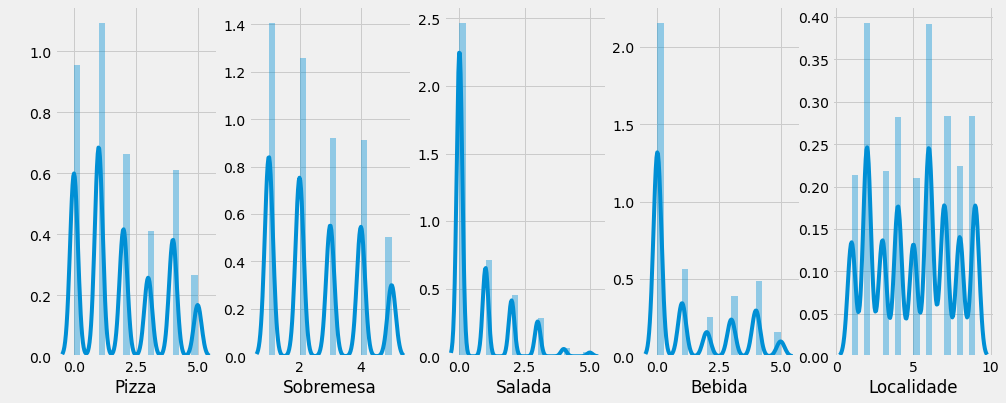

In [114]:
plt.figure(1, figsize = (15,6))

c = 0

for i in ['Pizza','Sobremesa', 'Salada','Bebida','Localidade']:
  c +=1
  plt.subplot(1, 5, c)
  sns.distplot(df_pivot[i], bins = 20)
  plt.ylabel(" ")

plt.show()

Essa análise será útil para escolhermos quais serão os atributos que usaremos para segmentação dos nossos clientes.

**Obs**: As unidades funcionam 24h e recebe uma quantidade menor de pedido entre 1h até 4h, porque a maioria das pessoas estão dormindo.

A variável Pizza tem o volume um pouquinho mais uniformes, isso significa que a pizza aparece em praticamente quase todos os pedidos e é fácil chegar a essa conclusão quando coparamos a pizza com a salada, há um pico imenso próximo de zero, porque a maioria dos pedidos não tem salada.

A variável Salada praticamente não tem nenhum volume próximo de 5, significa que a maioria dos pedidos não tem salada, mas têm pizza. 

O comportamento é parecido para a variável Bebida, há um volume maior para pedidos sem bebidas e praticamente todos os pedidos possuem sobremesa.

No que tange a variável Localidade, a explicação é a mesma que do plot abaixo.

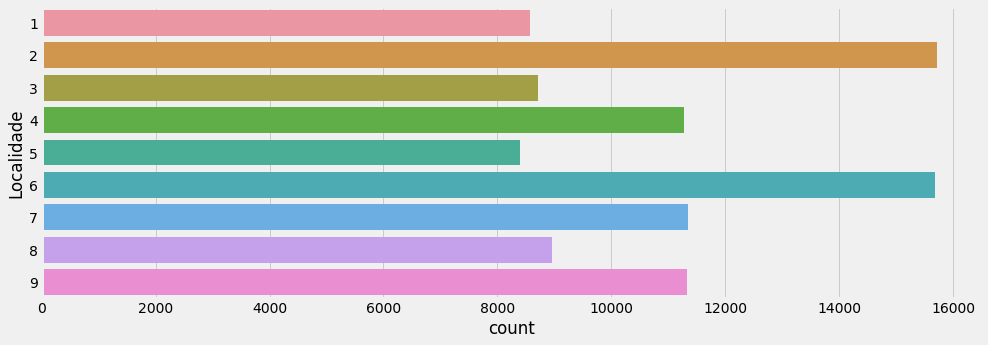

In [115]:
plt.figure(1, figsize = (15, 5))
sns.countplot( y = 'Localidade', data = df_pivot)

plt.show()

O plot acima, indica que a localidade com o maior número de pedidos é da unidade 2 e a localidade com o menor número de pedidos é da unidade 5.

Esse esses números fazem sentido, porque em teoria as unidades mais próximas do centro tedem a ter um volume maior de pedidos se comparado as unidades mais afastadas do centro da cidade.

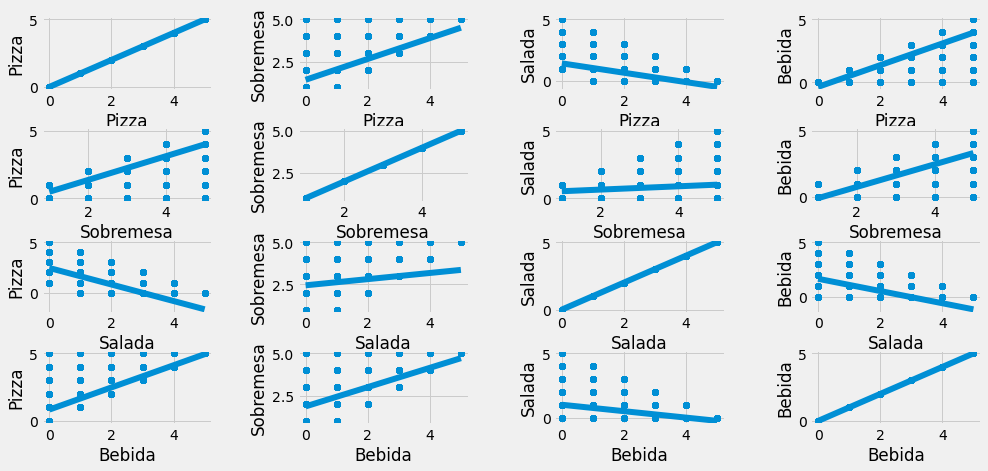

In [116]:
plt.figure(1 , figsize = (15 , 7))

n = 0 

for x in ['Pizza' , 'Sobremesa' , 'Salada', 'Bebida']:
    for y in ['Pizza' , 'Sobremesa' , 'Salada', 'Bebida']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df_pivot)
        plt.ylabel(y)
        
plt.show()

Essa é uma análise de conhecimento geral, não tem nenhuma análise avançada, o objetivo é mostrar que os dados fazem sentido, não necessáriamente estão corretos.

Para essa análise, ignore a diagonal, porque não faz sentido analisar a relação de uma variável com ela mesma, plotei a diagnal para construir o gráfico dessa forma, se eu não Incluísse a diagonal ficaria um buraco no gráfico e isso não seria muito agradável.

**Obs**: Não estou estudando nenhuma relação de causalidade.

Para cada pedido quanto maior o número de pizza, maior o número de sobremesa, não posso afirmar que toda pessoa que pede sobremesa também pede pizza, estou dizendo que com base nos dados, a medida que a pessoa pede mais sobremesa ela têm mais pizza em seu pedido.

Já no gráfico de pizza com salada o comportamento é inverso, ou seja a relação é negativa. A medida que aumenta o número de salada no pedido, diminui o número de pizza, o que inclusive faz todo sentido. Se uma pessoa come mais salada é bem provável que ela não coma tanta pizza.

Para bebidas o comportamento também é positivo, se eu tenho mais bebidas no pedido, eu tenho mais pizzas, é provavel que seja um grupo maior de pessoas que irá pedir mais pizza e mais bebidas.

O comportamento entre sobremesa e salada é quase uma linha reta na horizontal, isso indica que praticamente não há nenhum tipo de relação, independentemente se uma pessoa pede salada, pode ter ou não sobremesa, uma leve relação positiva, mas tendendo para não ter relação alguma.

Sobremesa com bebida tem uma relação positiva.

Salada com bebida tem uma relação negativa , Se aumenta a consumo de bebida, diminui o consumo de salada para um determinado pedido.

**Conclusão**:
Todos os comportamentos fazem sentido, caso fosse identificado um comportameno inesperado seria interessante verificar se houve algum problema nos dados ou no meu código ou voltar na área de negócio e questionar sobre isso.

## Definindo as Variáveis para Segmentação

Vamos remover id_transacao, horario_pedido, localidade e mes para nossas primeiras atividades de clusterização

In [117]:
df_pivot_idx[ : 7]

,index,Id_transacao,Horario_pedido,Localidade,Bebida,Pizza,Sobremesa,Salada,Mes
0,0,0x10000a,2019-01-29 00:48:00,9,0,1,1,0,01
1,1,0x100058,2019-05-05 00:08:00,6,0,2,2,0,05
2,2,0x1000c8,2019-01-28 19:24:00,9,4,4,5,1,01
3,3,0x10014c,2019-02-23 00:15:00,6,0,1,1,0,02
4,4,0x1001d8,2019-06-30 17:50:00,2,3,3,3,0,06
5,5,0x1002af,2019-12-28 17:25:00,9,3,3,4,1,12
6,6,0x10034c,2019-03-12 18:17:00,5,3,4,4,0,03


In [118]:
df = df_pivot_idx[['index', 'Bebida','Pizza','Sobremesa','Salada']]

In [119]:
 df.head()

,index,Bebida,Pizza,Sobremesa,Salada
0,0,0,1,1,0
1,1,0,2,2,0
2,2,4,4,5,1
3,3,0,1,1,0
4,4,3,3,3,0


## Primeira Segmentação

Vamos relaizar nossa primeira segmentação usando as variáveis pizza e sobremesa

In [120]:
X1 = df[['Pizza' , 'Sobremesa']].iloc[: , :].values

In [121]:
wcss_X1 = []

Representamos graficamente a relação entre o número de clusters e a soma dos quadrados dentro do cluster (WCSS) e em seguida, selecionamos o número de clusters no quais a mudança no WCSS começa a ser estabilizar (Método Elbow)

In [122]:
# Testando os valores de K

for i in range(2, 11):
    modelo = (KMeans(n_clusters = i,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(X1)
    wcss_X1.append(modelo.inertia_)

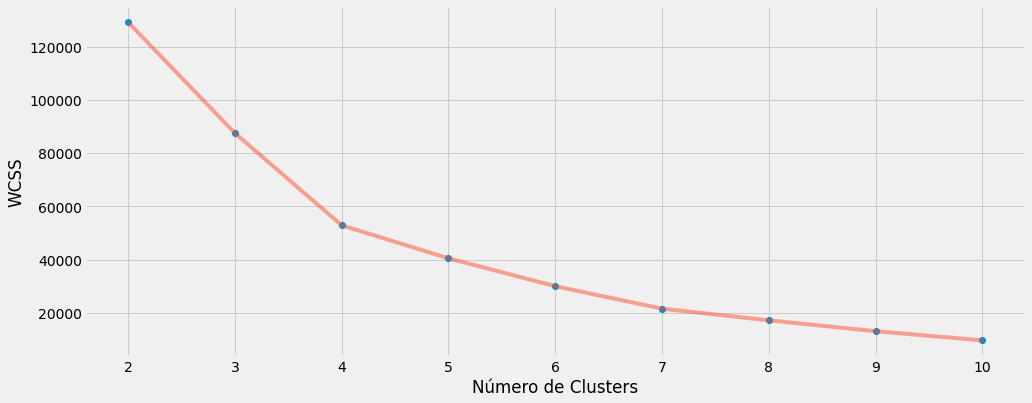

In [123]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , wcss_X1 , 'o')
plt.plot(np.arange(2 , 11) , wcss_X1 , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('WCSS')
plt.show()

#### **Construindo e Treinando o Primeiro Modelo**

In [124]:
modelo1 = KMeans(n_clusters = 2, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

In [125]:
modelo1.fit(X1)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [126]:
labels1 = modelo1.labels_
labels1

array([0, 0, 1, ..., 0, 0, 0], dtype=int32)

In [127]:
centroids1 = modelo1.cluster_centers_
centroids1

array([[0.881644  , 1.82183485],
       [3.79958153, 4.05580631]])

#### **Visualizando e interpretando os Segmentos**

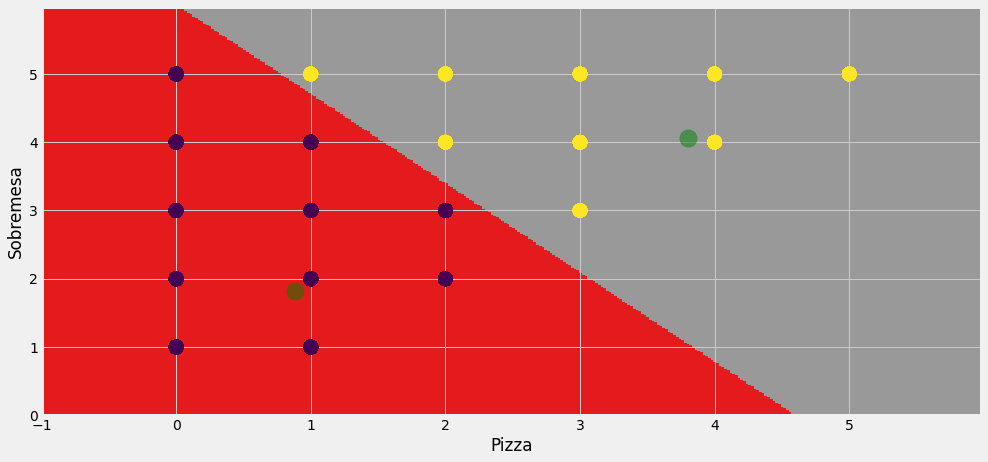

In [128]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo1.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set1, 
           aspect = 'auto', 
           origin = 'lower')

plt.scatter( x = 'Pizza', y = 'Sobremesa', data = df, c = labels1, s = 200 )
plt.scatter(x = centroids1[: , 0], y =  centroids1[: , 1], s = 300, c = 'green', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()

**Interpretação**:

* O ponto verde é o centróide de cada segmento.

* No segmento 1 (área em vermelho) temos os clientes que pediram 0, 1 ou 2 pizzas, mas em todos os casos houve pedido de Sobremesa.

* No segmento 2 (área em cinza) estão clientes que pediram 2, 3, 4 ou 5 pizzas. Percebi que à medida que o pedido tem maior número de pizzas, também aumenta o número de sobremesas.

**Análise**:

* Segmento 1 - Clientes que pedem menos pizzas. Todos pedem sobremesa.

* Segmento 2 - Clientes que pedem mais pizzas. Todos pedem sobremesa em volume maior.

Como estratégia de Marketing, poderíamos oferecer ao cliente uma sobremesa grátis no caso da compra de mais uma pizza de maior valor. Com base na Segmentação provavelmente essa estratégia teria sucesso.

## Segunda Segmentação

Vamos relaizar nossa segunda segmentação usando as variáveis pizza e salada

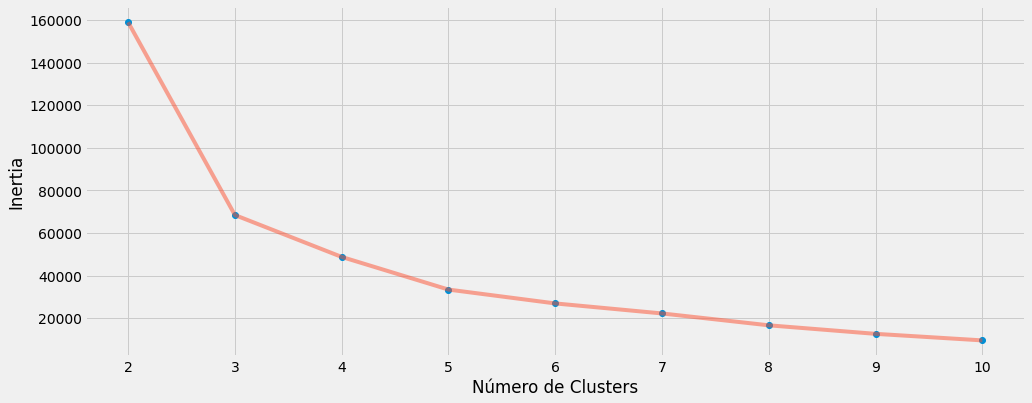

In [129]:
X1 = df[['Pizza' , 'Salada']].iloc[: , :].values

inertia = []

for i in range(2 , 11):
    modelo = (KMeans(n_clusters = i,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(X1)
    inertia.append(modelo.inertia_)

# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inertia')
plt.show()

#### Construindo e Treinando o Segundo Modelo

In [130]:
modelo2 = (KMeans(n_clusters = 3,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan') )

modelo2.fit(X1)

labels2 = modelo2.labels_

centroids2 = modelo2.cluster_centers_

#### Visualizando e Interpretando os Segmentos do Segundo Modelo

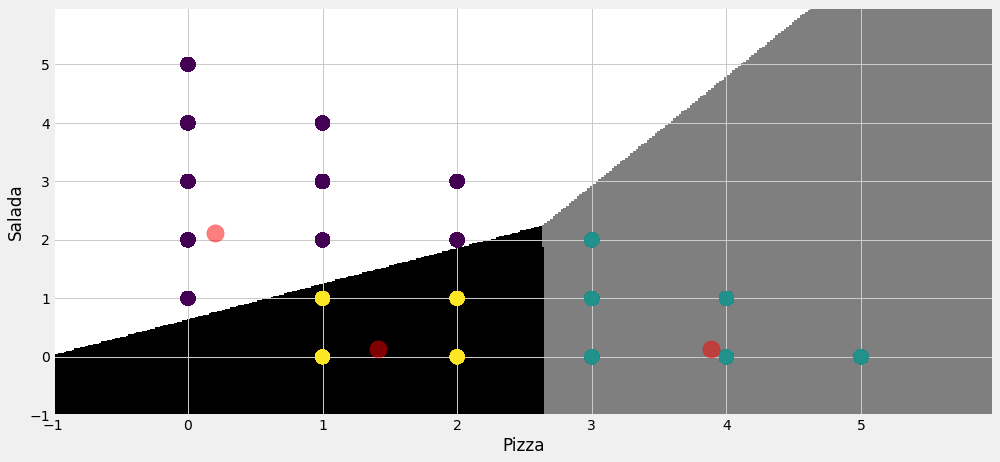

In [131]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo2.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.gist_yarg, 
           aspect = 'auto', 
           origin = 'lower')

plt.scatter( x = 'Pizza', y = 'Salada', data = df, c = labels2, s = 200 )
plt.scatter(x = centroids2[: , 0], y =  centroids2[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Salada')
plt.show()

**Interpretação**:

* O ponto vermelho é o centróide de cada segmento.

* No segmento 1 (área em branco) temos os clientes que pediram menos Pizzas e mais Saladas.

* No segmento 2 (área em preto) temos os clientes que pediram poucas Pizzas e poucas Saladas.

* No segmento 3 (área em cinza) estão os clientes que pediram mais Pizzas e menos Saladas.

**Análise**:

Os segmentos 1 e 3 são de clientes com comportamentos opostos. A equipe de Marketing poderia concentrar os esforços nos clientes do segmento 2, porque são esses clientes que compram pizzas e saladas, em outras palavras, são esses clientes que tendem a consumir mais itens variados evitando manter os estoques cheios de um único item. 

Uma segunda sugestão seria concentrar os esforços nos clientes que consomem produtos que geram mais lucro, mas para isso terei que verificar qual item (pizza ou salada) é mais rentável.

## Terceira Segmentação

Vamos relaizar nossa terceira segmentação usando as variáveis pizza e localidade.

In [132]:
df2 = df
df2

,index,Bebida,Pizza,Sobremesa,Salada
0,0,0,1,1,0
1,1,0,2,2,0
2,2,4,4,5,1
3,3,0,1,1,0
4,4,3,3,3,0
...,...,...,...,...,...
99995,99995,4,4,4,0
99996,99996,0,1,1,0
99997,99997,1,1,1,0
99998,99998,0,2,2,0


In [133]:
df2['Localidade'] = df_pivot['Localidade']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [134]:
df2.head()

,index,Bebida,Pizza,Sobremesa,Salada,Localidade
0,0,0,1,1,0,9
1,1,0,2,2,0,6
2,2,4,4,5,1,9
3,3,0,1,1,0,6
4,4,3,3,3,0,2


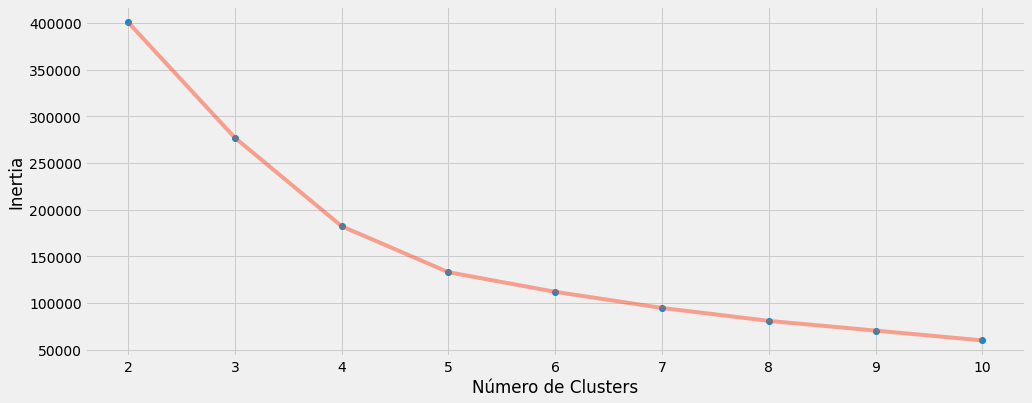

In [135]:
X1 = df2[['Pizza' , 'Localidade']].iloc[: , :].values

inertia = []

for i in range(2 , 11):
    modelo = (KMeans(n_clusters = i,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo.fit(X1)
    inertia.append(modelo.inertia_)

plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 11) , inertia , 'o')
plt.plot(np.arange(2 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Inertia')
plt.show()

#### **Construindo e Treinando o Terceiro Modelo**

In [136]:
modelo3 = (KMeans(n_clusters = 4,
                      init = 'k-means++', 
                      n_init = 10 ,
                      max_iter = 300, 
                      tol = 0.0001,  
                      random_state = 111  , 
                      algorithm = 'elkan') )

modelo3.fit(X1)

labels3 = modelo3.labels_

centroids3 = modelo3.cluster_centers_

#### **Visualizando e Interpretando os Segmentos do Terceiro Modelo**

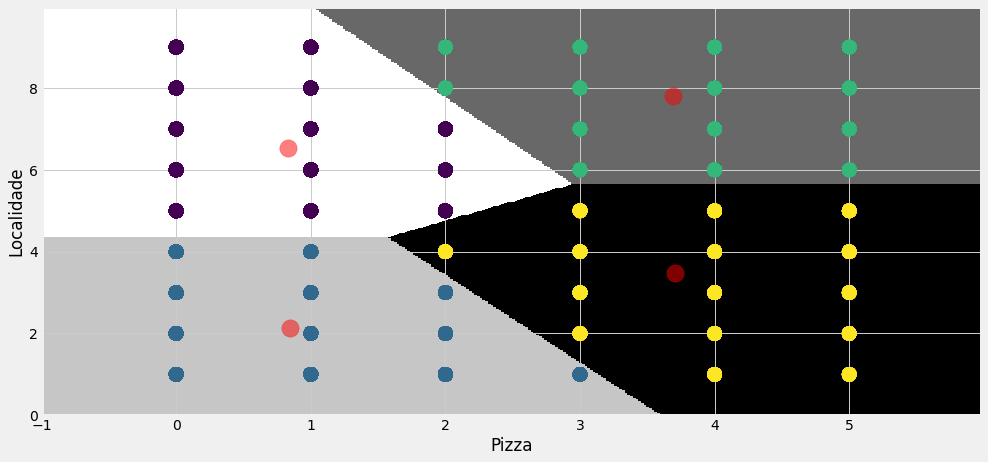

In [137]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = modelo3.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15, 7) )
plt.clf()
Z = Z.reshape(xx.shape)

plt.imshow(Z, 
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Greys, 
           aspect = 'auto', 
           origin = 'lower')

plt.scatter( x = 'Pizza', y = 'Localidade', data = df2, c = labels3, s = 200 )
plt.scatter(x = centroids3[: , 0], y =  centroids3[: , 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Localidade')
plt.show()

**Interpretação**:

- O ponto vermelho é o centróide de cada segmento.

- Observe que os segmentos da esquerda no gráfico contém os pedidos de todas as Localidades, mas com menor número de Pizzas. Já os segmentos da direita no gráfico contém pedidos de todas as Localidades com maior número de Pizzas.

**Análise**:

Para que eu possa ajudar o time de marketing impulsionar os esforços em busca de um aumento nas vendas, terei que investigar mais a fundo os pedidos dos segmentos à esquerda do gráfico e compreender em mais detalhes as características desses pedidos e que tipo de oferta podemos fazer.